In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt


##Data preparing and loading##

In [2]:
weights = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange( start, end, step).unsqueeze(dim=1)
y= weights*X + bias

In [3]:
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

###spliting data into training and test sets ###

In [4]:
#create train test split
train_split=int(0.8* len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [5]:
#visualizing the data

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
  plt.scatter(test_data,test_labels,c="g",s=4,label="testing data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="predictions")

  plt.legend()


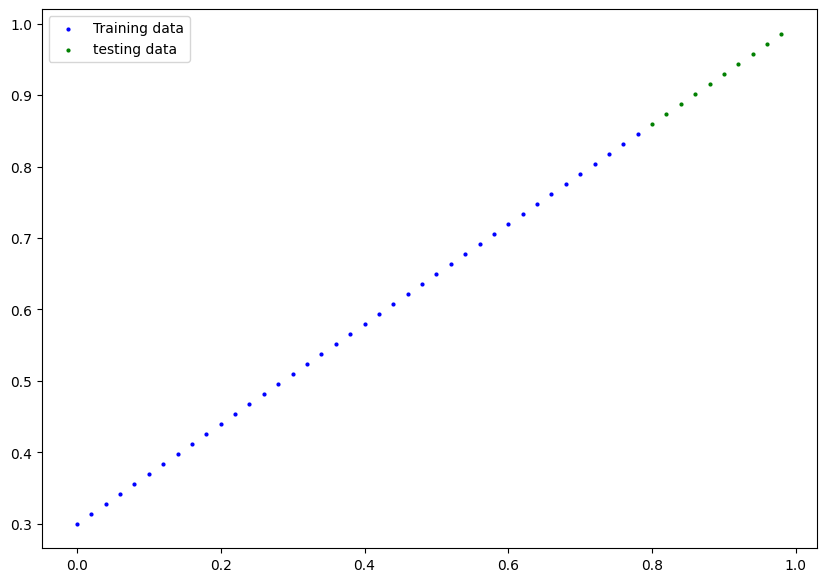

In [6]:
plot_predictions()

##build a model##

In [7]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)


In [8]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds



tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

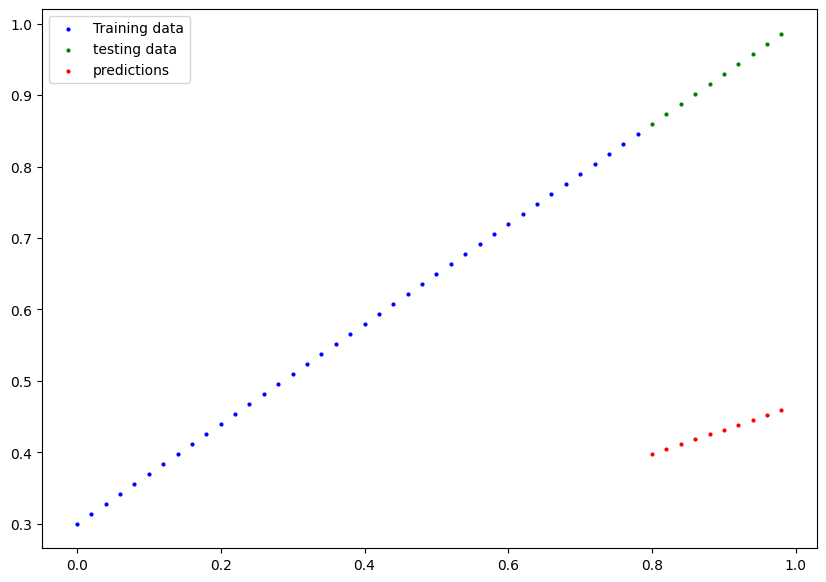

In [11]:
plot_predictions(predictions=y_preds)

##training a model

In [12]:
#setup a loss function
loss_fn=nn.L1Loss()

#setup an optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01)      #learning rate

###Building a training loop in pytorch

In [13]:
#an epoch is a one loop through the data
epochs =200

epoch_count=[]
loss_values=[]
test_loss_values=[]

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)


    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()
    with torch.inference_mode():
      #do the forward pass
      test_pred=model_0(X_test)

      #calculate the loss
      test_loss=loss_fn(test_pred,y_test)

    if epoch %10 ==0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | loss : {loss} | Test loss: {test_loss}")



Epoch: 0 | loss : 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch: 10 | loss : 0.1976713240146637 | Test loss: 0.3463551998138428
Epoch: 20 | loss : 0.08908725529909134 | Test loss: 0.21729660034179688
Epoch: 30 | loss : 0.053148526698350906 | Test loss: 0.14464017748832703
Epoch: 40 | loss : 0.04543796554207802 | Test loss: 0.11360953003168106
Epoch: 50 | loss : 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch: 60 | loss : 0.03818932920694351 | Test loss: 0.08886633068323135
Epoch: 70 | loss : 0.03476089984178543 | Test loss: 0.0805937647819519
Epoch: 80 | loss : 0.03132382780313492 | Test loss: 0.07232122868299484
Epoch: 90 | loss : 0.02788739837706089 | Test loss: 0.06473556160926819
Epoch: 100 | loss : 0.024458957836031914 | Test loss: 0.05646304413676262
Epoch: 110 | loss : 0.021020207554101944 | Test loss: 0.04819049686193466
Epoch: 120 | loss : 0.01758546568453312 | Test loss: 0.04060482233762741
Epoch: 130 | loss : 0.014155393466353416 | Test loss: 0.032332

In [14]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)

In [15]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

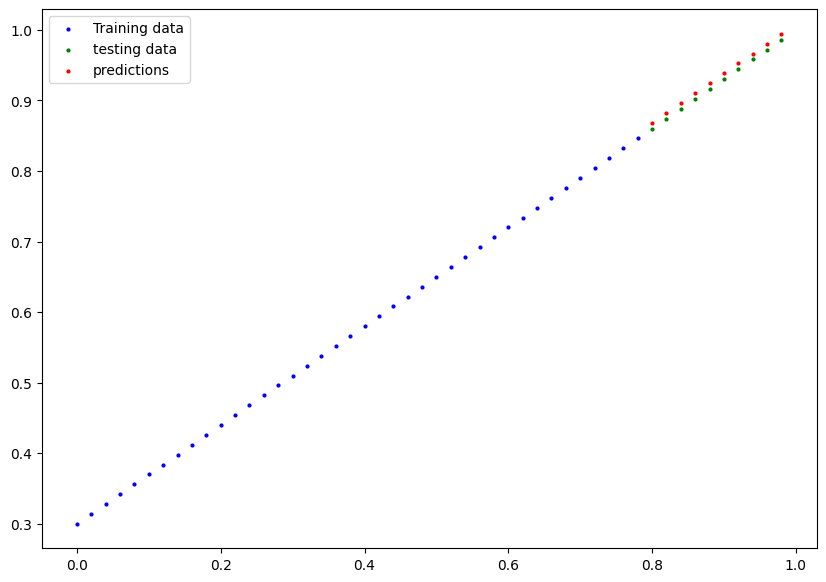

In [16]:
plot_predictions(predictions=y_preds_new)

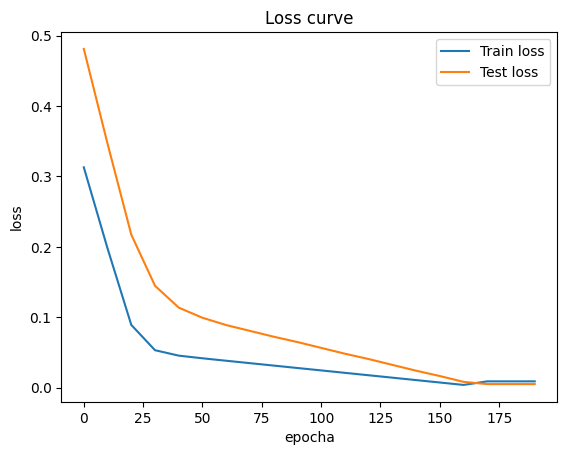

In [17]:
#plot the loss curve
import numpy as np
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="Train loss")
plt.plot(epoch_count,np.array(torch.tensor(test_loss_values).numpy()),label="Test loss")
plt.title("Loss curve")
plt.xlabel("epocha")
plt.ylabel("loss")
plt.legend();

##Saving a model

In [18]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [19]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [20]:
#make predictions using the loaded models
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds=loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

##Putting all together

In [21]:
#import pytorch
import torch
from torch import nn
import matplotlib.pyplot as plt



In [22]:
#setting up the devide
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [23]:
weight=0.7
bias=0.3

start=0
end=1
step=0.02

X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight *X +bias



In [24]:
#split the data
train_split=int(0.8 * len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

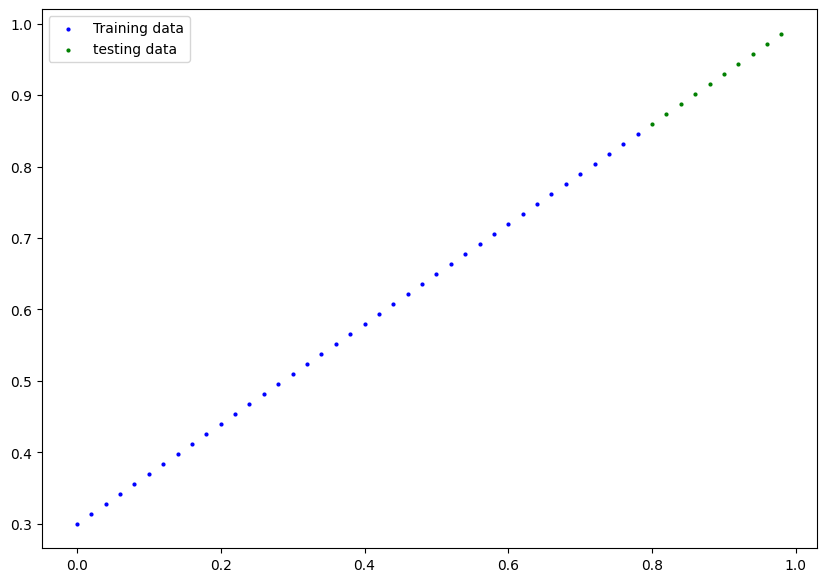

In [25]:
#plot the data
plot_predictions(X_train,y_train,X_test,y_test)

#builing a pytorch model by subclassing

In [26]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always need but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [28]:
# Check model device
next(model_1.parameters()).device

device(type='cpu')

In [29]:
#set the model to the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [32]:
#setup loss function
loss_fn=nn.L1Loss()

#setup an optimizer
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.01)


In [34]:
#training loop
torch.manual_seed(42)

epochs=200

#put data in the same target device
X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  #forward pass
  y_pred=model_1(X_train)

  #calculate the loss
  loss=loss_fn(y_pred,y_train)

  #optimizer zero grad
  optimizer.zero_grad()

  #perform back propogation
  loss.backward()

  #optimzer step
  optimizer.step()

  ###TESTING
  model_1.eval()

  with torch.inference_mode():
    test_pred=model_1(X_test)

    test_loss=loss_fn(test_pred,y_test)

  if epoch % 10==0:
    print(f"Epoch:{epoch} | Loss:{loss} | Test Loss:{test_loss}")



Epoch:0 | Loss:0.5551779866218567 | Test Loss:0.5739762187004089
Epoch:10 | Loss:0.439968079328537 | Test Loss:0.4392664134502411
Epoch:20 | Loss:0.3247582018375397 | Test Loss:0.30455657839775085
Epoch:30 | Loss:0.20954833924770355 | Test Loss:0.16984669864177704
Epoch:40 | Loss:0.09433845430612564 | Test Loss:0.03513690456748009
Epoch:50 | Loss:0.023886388167738914 | Test Loss:0.04784907028079033
Epoch:60 | Loss:0.019956795498728752 | Test Loss:0.045803118497133255
Epoch:70 | Loss:0.016517987474799156 | Test Loss:0.037530567497015
Epoch:80 | Loss:0.013089174404740334 | Test Loss:0.02994490973651409
Epoch:90 | Loss:0.009653178043663502 | Test Loss:0.02167237363755703
Epoch:100 | Loss:0.006215683650225401 | Test Loss:0.014086711220443249
Epoch:110 | Loss:0.00278724217787385 | Test Loss:0.005814164876937866
Epoch:120 | Loss:0.0012645035749301314 | Test Loss:0.013801801018416882
Epoch:130 | Loss:0.0012645035749301314 | Test Loss:0.013801801018416882
Epoch:140 | Loss:0.0012645035749301314

In [35]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [36]:
#making and evaluating predictions
#turn model into eval mode
model_1.eval()

#make predictions on test data
with torch.inference_mode():
  y_preds=model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

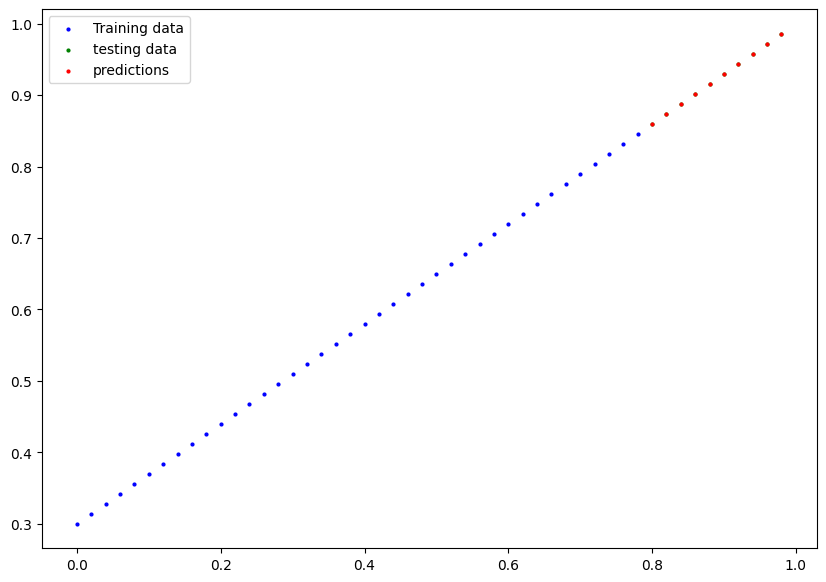

In [38]:
#plot the graph
plot_predictions(predictions=y_preds.cpu())

In [39]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_workflow_model_1.pth


In [40]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


In [41]:
#evaluate the model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds=loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')